In [9]:
import cv2
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [7]:
# OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

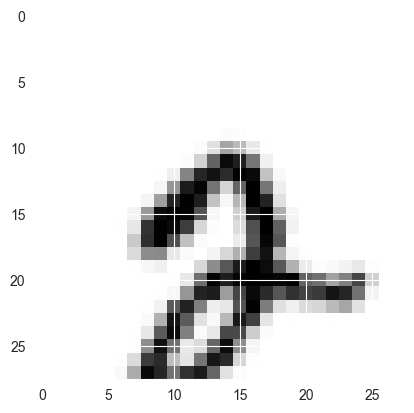

In [13]:
# 변환된 이미지 확인
plt.imshow(test_image, cmap='Greys')

In [14]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [16]:
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) 
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04

ValueError: in user code:

    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 784), found shape=(1000, 28, 28)


In [17]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 52ms/step


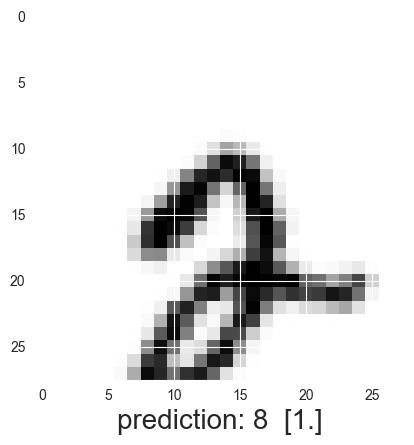

In [18]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

* 수치에 변환을 주어서 그림은 2지만 모델은 8을 예측함